In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_excel("F9.xlsx")

In [5]:
df.head()

,COIL_PRODUCED_DATETIME,CoilNo,SlabNo,GRADE,Thick,Width,Order,Product,Spec,Retention,ECL,MC,TC,TE,ZZ
0,2022-12-30 13:00:56,1971525,787320009,7,1.453895,1231,15158-10,HB,12,17,0,0,0,1,3
1,2022-12-30 13:06:43,1971526,787320010,7,1.454773,1231,15158-10,HB,12,17,0,0,0,1,3
2,2022-12-30 13:12:25,1971527,787320011,7,1.453722,1231,15158-10,HB,12,18,0,0,0,1,4
3,2022-12-30 13:18:07,1971528,787320012,7,1.454454,1230,15158-10,HB,12,18,0,0,0,1,0
4,2022-12-30 13:24:14,1971529,787330001,7,1.410000,1230,15155-20,HB,12,18,0,0,0,1,4


In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
X=df[["Width","Thick","Retention","Spec","GRADE"]]
y=df["TE"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
model=DecisionTreeClassifier(random_state=42,criterion="entropy",max_depth=5)

In [10]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [11]:
y_pred=model.predict(X_test)

In [12]:
from sklearn import metrics

In [13]:
metrics.f1_score(y_test,y_pred)

0.7762882603642

In [14]:
metrics.confusion_matrix(y_test,y_pred)

array([[ 679, 2474],
       [ 413, 5009]], dtype=int64)

In [15]:
from sklearn import tree

In [16]:
l1=["Width","Thick","Retention","Spec","GRADE"]

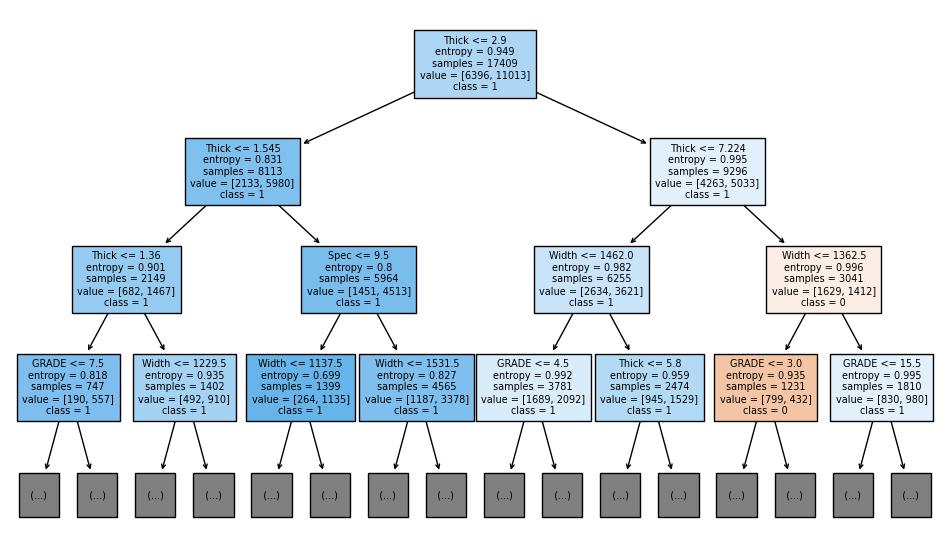

In [17]:
fig=plt.figure(figsize=(12,7))
tree.plot_tree(model,feature_names=l1,class_names=["0","1"],filled=True,max_depth=3,fontsize=7)
plt.show()

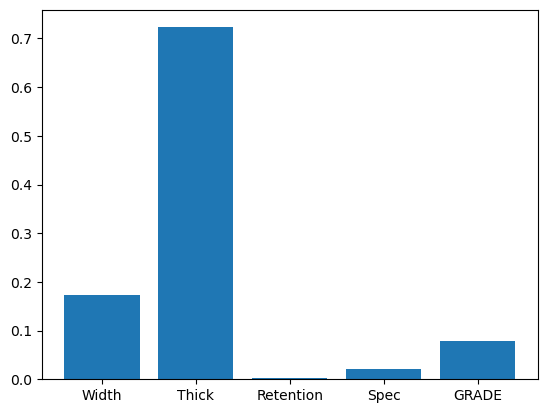

In [18]:
plt.bar(l1,model.feature_importances_)
plt.show()

In [19]:
df.head()

,COIL_PRODUCED_DATETIME,CoilNo,SlabNo,GRADE,Thick,Width,Order,Product,Spec,Retention,ECL,MC,TC,TE,ZZ
0,2022-12-30 13:00:56,1971525,787320009,7,1.453895,1231,15158-10,HB,12,17,0,0,0,1,3
1,2022-12-30 13:06:43,1971526,787320010,7,1.454773,1231,15158-10,HB,12,17,0,0,0,1,3
2,2022-12-30 13:12:25,1971527,787320011,7,1.453722,1231,15158-10,HB,12,18,0,0,0,1,4
3,2022-12-30 13:18:07,1971528,787320012,7,1.454454,1230,15158-10,HB,12,18,0,0,0,1,0
4,2022-12-30 13:24:14,1971529,787330001,7,1.410000,1230,15155-20,HB,12,18,0,0,0,1,4
